# 1.Setup and Load Data

1.1 Install Dependencies and Setup

In [274]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [275]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [276]:
pip list

Package                           VersionNote: you may need to restart the kernel to use updated packages.

--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4

In [277]:
import tensorflow as tf
import os

In [278]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

1.2 Remove dodgy images

In [279]:
import cv2
import imghdr

In [280]:
import os

# Define the path
data_dir = r'C:\Users\KIIT\Downloads\Jupyter\Data'

# Create the directory
os.makedirs(data_dir, exist_ok=True)

print(f"Directory {data_dir} created successfully!")


Directory C:\Users\KIIT\Downloads\Jupyter\Data created successfully!


In [281]:
data_dir

'C:\\Users\\KIIT\\Downloads\\Jupyter\\Data'

In [282]:
image_exts = ['jpeg','jpg','bmp','png']

In [283]:
os.listdir(data_dir)

['happy', 'sad']

In [284]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1-2.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile-svg_.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-r.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'ACg8ocLZR2JMhCz1BA3hgnU2zz8ZmByv35fOpIRLGExYZ1Ss0bJnAx5Z-s12.png',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'al-icon.png',
 'A_Sep20_14_1189155141.jpg',
 

In [285]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [286]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not  in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

1.3 Load Data

In [287]:
import numpy as np
from matplotlib import pyplot as plt

In [288]:
data = tf.keras.utils.image_dataset_from_directory('data')  #building the data pipeline

Found 406 files belonging to 2 classes.


In [289]:
data_iterator = data.as_numpy_iterator() #allowing to access the data 

In [290]:
batch = data_iterator.next() #accessing the data

In [291]:
batch

(array([[[[ 19.        ,  22.        ,  11.        ],
          [ 19.        ,  22.        ,  11.        ],
          [ 19.        ,  22.        ,  11.        ],
          ...,
          [ 44.        ,  54.        ,  43.        ],
          [ 44.        ,  54.        ,  43.        ],
          [ 44.        ,  54.        ,  43.        ]],
 
         [[ 19.        ,  22.        ,  11.        ],
          [ 19.        ,  22.        ,  11.        ],
          [ 19.        ,  22.        ,  11.        ],
          ...,
          [ 44.        ,  54.        ,  43.        ],
          [ 44.        ,  54.        ,  43.        ],
          [ 44.        ,  54.        ,  43.        ]],
 
         [[ 19.        ,  22.        ,  11.        ],
          [ 19.        ,  22.        ,  11.        ],
          [ 19.        ,  22.        ,  11.        ],
          ...,
          [ 44.        ,  54.        ,  43.        ],
          [ 44.        ,  54.        ,  43.        ],
          [ 44.        ,  54.  

In [292]:
len(batch)   # Images(0) and Labels(1)

2

In [293]:
 # Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [294]:
# Class 1 --> Sad people  , Class 2 --> Happy people
batch[1]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

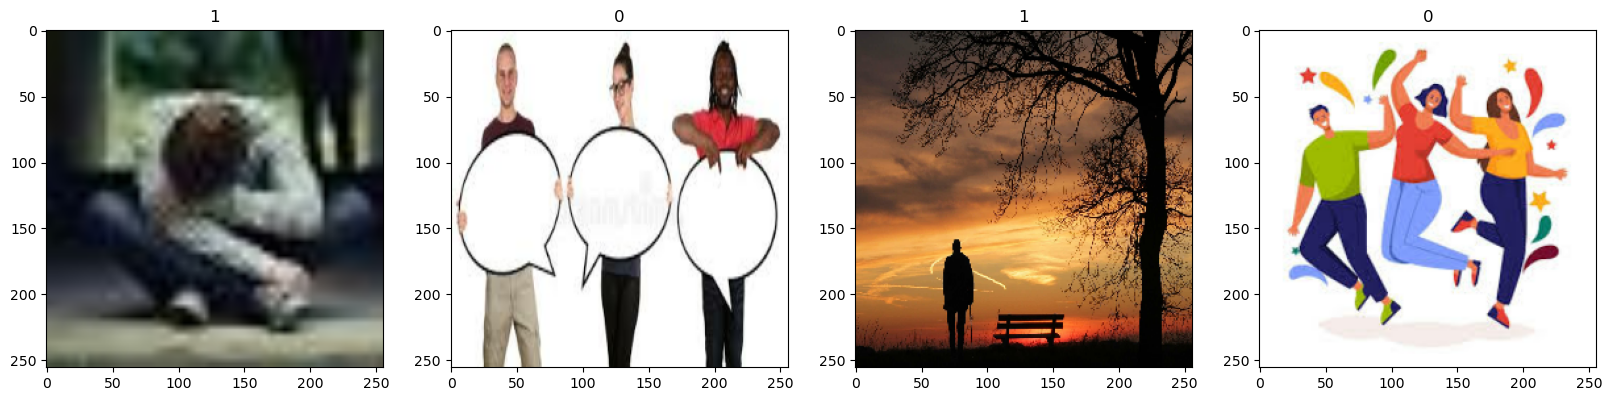

In [295]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [296]:
batch[0].min()

0.0

In [297]:
batch[0].max()

255.0

# Preprocess Data

2.1 Scale Data

In [298]:
data = data.map(lambda x,y: (x/255, y))

In [299]:
scaled_iterator = data.as_numpy_iterator()

In [300]:
batch = scaled_iterator.next()

In [301]:
batch[0].max()

1.0

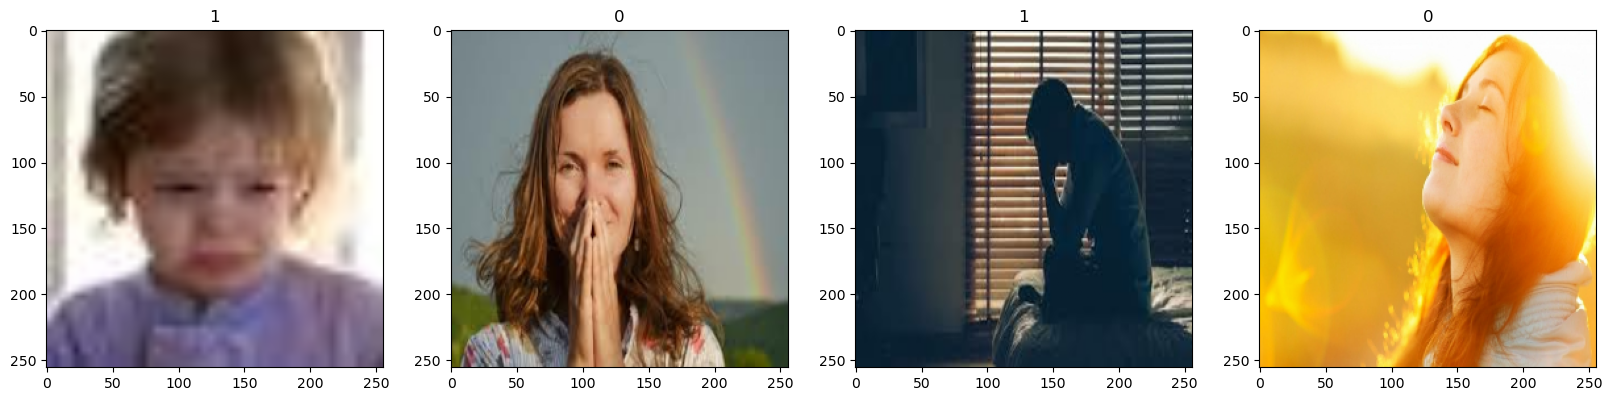

In [302]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [303]:
len(data)

13

In [304]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [305]:
train_size + val_size + test_size

14

In [306]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size*val_size).take(test_size)

# Deep Model

3.1 Build Deep Learning Model

In [307]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [308]:
model = Sequential()

In [309]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [310]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [311]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [312]:
logdir = 'logs'

In [313]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [314]:
hist = model.fit(train, epochs=20, validation_data= val, callbacks = [tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 592ms/step - accuracy: 0.5333 - loss: 0.9287 - val_accuracy: 0.5938 - val_loss: 0.6538
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 535ms/step - accuracy: 0.6702 - loss: 0.6724 - val_accuracy: 0.7500 - val_loss: 0.6168
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 511ms/step - accuracy: 0.6576 - loss: 0.6397 - val_accuracy: 0.7604 - val_loss: 0.5337
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 509ms/step - accuracy: 0.7158 - loss: 0.5550 - val_accuracy: 0.7812 - val_loss: 0.5113
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 526ms/step - accuracy: 0.8313 - loss: 0.4423 - val_accuracy: 0.8750 - val_loss: 0.3196
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 534ms/step - accuracy: 0.8307 - loss: 0.4050 - val_accuracy: 0.8542 - val_loss: 0.3797
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 532ms/step - accuracy: 0.8841 - loss: 0.3260 - val_accuracy: 0.8958 - val_loss: 0.2315
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.8968 - loss: 0.2679 - val_accuracy: 0.9583 - val_loss

In [315]:
hist.history

{'accuracy': [0.5347222089767456,
  0.6840277910232544,
  0.6840277910232544,
  0.7118055820465088,
  0.8263888955116272,
  0.8263888955116272,
  0.8958333134651184,
  0.9166666865348816,
  0.9444444179534912,
  0.9618055820465088,
  0.9444444179534912,
  0.9583333134651184,
  0.9756944179534912,
  0.9652777910232544,
  0.9722222089767456,
  0.9791666865348816,
  0.9756944179534912,
  0.9791666865348816,
  0.9791666865348816,
  0.9791666865348816],
 'loss': [0.8733912110328674,
  0.6688750386238098,
  0.6193770170211792,
  0.562397837638855,
  0.41724106669425964,
  0.42038482427597046,
  0.31591546535491943,
  0.2406313419342041,
  0.16809797286987305,
  0.13737505674362183,
  0.14663182199001312,
  0.16329170763492584,
  0.07738440483808517,
  0.12153712660074234,
  0.09147271513938904,
  0.08142382651567459,
  0.07890194654464722,
  0.05860322713851929,
  0.04595256224274635,
  0.05338007211685181],
 'val_accuracy': [0.59375,
  0.75,
  0.7604166865348816,
  0.78125,
  0.875,
  0.854

3.3 Plot Performance

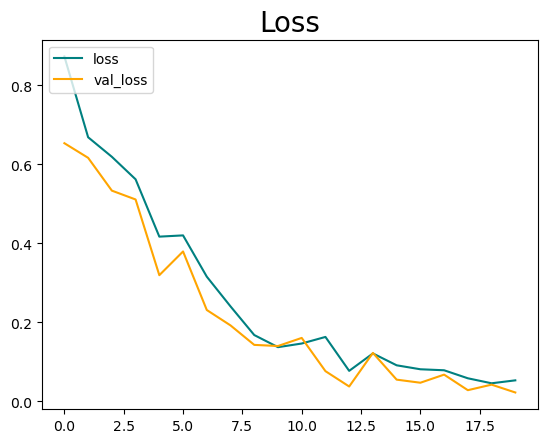

In [316]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
plt.title('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

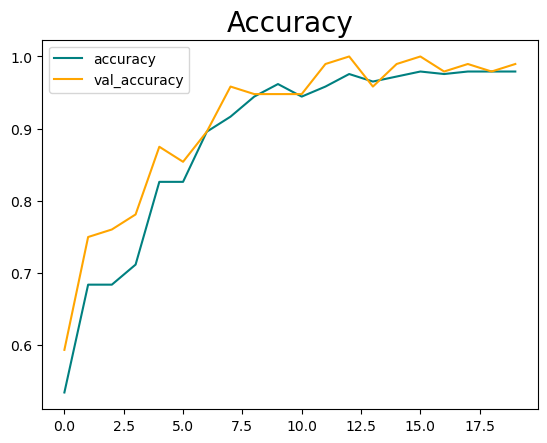

In [317]:
fig= plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Performance

4.1 Evaluate

In [318]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [319]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [320]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [321]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Test

<function matplotlib.pyplot.show(close=None, block=None)>

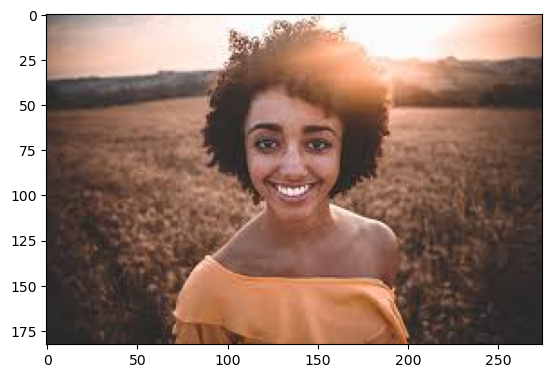

In [322]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

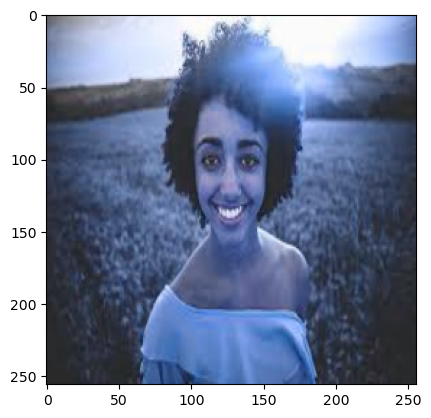

In [323]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [324]:
resize.shape

TensorShape([256, 256, 3])

In [325]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


In [326]:
yhat

array([[0.10891619]], dtype=float32)

In [327]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


<function matplotlib.pyplot.show(close=None, block=None)>

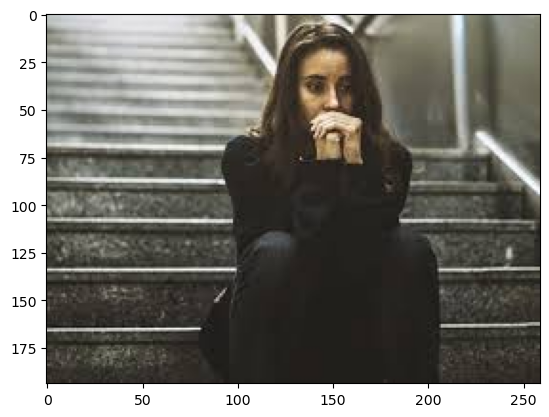

In [328]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

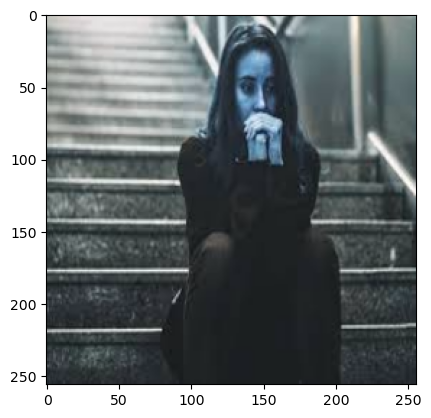

In [329]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [330]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.9998087]], dtype=float32)

In [331]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Save the Model

In [332]:
from tensorflow.keras.models import load_model

In [333]:
model.save(os.path.join('models','happysadmodel.h5'))

In [334]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [335]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


In [336]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
